# **Capstone Module 3 - Ecommerce Customer Churn**

## **Business Problem Understanding**

**Context** <br>
Divisi Big Data yang ada pada suatu perusahaan e-commerce sedang diminta untuk melakukan identifikasi pelanggan yang akan hilang atau tidak lagi menggunakan layanan perusahaan. Salah satu fungsinya melakukan identifikasi pelanggan tersebut adalah untuk menawarkan penawaran-penawaran khusus yang dapat membuat pelanggan tersebut tidak hilang dan tetap menggunakan layanan perusahaan. Fenomena pelanggan yang berpotensi hilang atau tidak lagi menggunakan layanan perusahaan dapat disebut sebagai Customer Churn. Dengan adanya aktivitas ini diharapkan pelanggan-pelanggan tetap loyal terhadap layanan yang diberikan oleh perusahaan.

**Problem Statement** <br>
Hal yang diperlukan untuk melakukan aktivitas ini adalah dengan membuat problem statement. Fenomena Customer Churn ini dapat disebabkan oleh banyak faktor seperti munculnya pesaing-pesaing baru perusahaan yang memiliki layanan sejenis, layanan perusahaan yang kurang memuaskan dan lain sebagainya. Hal ini memiliki sedikit ambiguitas karena ketidaktahuan secara pasti penyebab dari Customer Churn.

Oleh sebab itu tugas dari Divisi Big Data akan memprediksi fenomena Customer Churn ini. Dengan adanya aktivitas ini membuat perusahaan dapat mengantisipasi fenomena Customer Churn yang akan terjadi nantinya.

**Goals** <br>
Maka berdasarkan context dan permasalahan tersebut, perusahaan membutuhkan kemampuan memprediksi kemungkinan pelanggan yang dapat churn dikemudian hari. Hal tersebut bertujuan agar pendapatan perusahaan tidak akan berkurang dikemudian hari kare terjadinya Customer Churn. 

Selain itu, perusahaan juga ingin mengetahui faktor dan variabel apa saja yang menyebabkan terjadinya Customer Churn. Dengan mengetahui hal tersebut perusahaan dapat membuat rencana yang lebih baik untuk mendekati pelanggan agar tetap loyal terhadap layanan yang diberikan oleh perusahaan.

**Analytic Approach** <br>
Jadi kita akan melakukan analisis data untuk menemukan pelanggan yang akan Churn dan pelanggan yang tetap loyal pada layanan yang diberikan oleh perusahaan.kemudian hasil analisis tersebut dapat kita gunakan untuk membuat program atau promosi atau kegiatan lainnya yang bertujuan untuk tetap mempertahankan pelanggan yang memiliki kemungkinan Churn.

**Metric Evaluation** <br>
Type 1 error : False Positive  
Konsekuensi: Biaya penawaran khusus yang dikeluarkan oleh perusahaan menjadi sia-sia. <br><br>
Type 2 error : False Negative  
Konsekuensi: Pelanggan melakukan Churn dan tidak lagi menggunakan layanan perusahaan. <br><br>
Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah dengan mengoptimalkan biaya pengeluaran yang dikeluarkan oleh perusahaan untuk membuat penawaran maupun promo khusus untuk pelanggan dan tidak membuat pelanggan menjadi Churn. <br>
Jadi, matric yang cocok untuk digunakan dalam kasus ini adalah roc_auc. Karena kita akan memaksimalkan nilai **Recall/True Positive Rate** dan meminimalkan **False Positive Rate**.

## **Data Understanding**

### **Attribute Information**

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| tenure | Float | Tenure of customer in organization |
| WarehouseToHome | Float | Distance in between warehouse to home of customer |
| NumberOfDeviceRegistered | Integer | Total number of deceives is registered on particular customer |
| PreferedOrderCat | Text | Preferred order category of customer in last month |
| SatisfactionScore | Integer | Satisfactory score of customer on service |
| MaritalStatus | Text | Marital status of customer |
| NumberOfAddress | Integer | Total number of added added on particular customer |
| Complain | Integer | Any complaint has been raised in last month |
| DaySinceLastOrder | Float | Day Since last order by customer |
| CashbackAmount | Float | Average cashback in last month |
| Churn | Integer | Churn Flag |

### **Library**

Sebelum dimulai proses kegiatan analisis kali ini, yang pertama yang harus dilakukan adalah menyiapkan library-library yang dibutuhkan. Apabila ada library yang belum diinstall maka kita harus menginstall libarary tersebut. 

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [ ]:
# Data Frame Library
import numpy as np
import pandas as pd

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import Image

# Feature Engineering Library
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC

# Model Selection Library
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

# Evaluation
import shap 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

# Addition
import pickle
import sys
import warnings
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### **Import Data**

Selanjutnya dilakukan loading dataset yang sudah ada dan menyimpannya pada variabel baru.

In [ ]:
# Load dataset yang sudah ada
df_raw = pd.read_csv('data_ecommerce_customer_churn.csv')

df = df_raw.copy()
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


###  **Data Exploration 1**

Setelah itu langkah selanjutnya adalah melihat informasi dari dataset tersebut, kali ini akan dilakukan beberpa proses yaitu:
1. menampilkan informasi yang ada di dataset berupa **jumlah kolom, jumlah baris dan datatype** dari dataset tersebut. 
1. melihat pada datset apakah ada data yang kosong (null/NaN).
1. melihat apakah ada data yang memiliki duplikat di dataset tersebut.
1. melihat nilai yang paling banyak muncul di kolom **PreferedOrderCat** dan **MaritalSatus**.
1. melihat dekripsi dari dataset yang kita miliki (standard deviasi, mean, median, modus, dll)

#### **Dataset Information**

In [ ]:
# Melihat informasi yang ada di dataset (jumlah kolom dan baris, datatype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


#### **Missing Value Data**

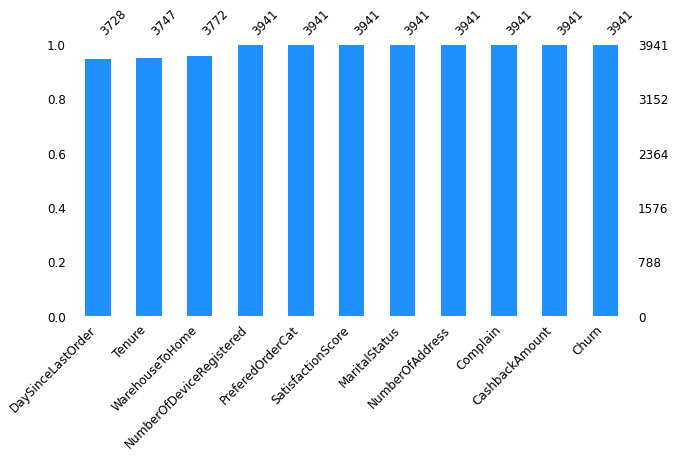

In [ ]:
# melihat data kosong pada dataset
msno.bar(df,color='dodgerblue', sort='ascending', figsize=(10,5), fontsize=12);

#### **Duplicate Data**

In [ ]:
# Melihat data yang memiliki duplikat
display(df[df.duplicated(subset=None)].count())

Tenure                      637
WarehouseToHome             637
NumberOfDeviceRegistered    671
PreferedOrderCat            671
SatisfactionScore           671
MaritalStatus               671
NumberOfAddress             671
Complain                    671
DaySinceLastOrder           639
CashbackAmount              671
Churn                       671
dtype: int64

#### **Most Value**

In [ ]:
# Melihat nilai yang paling banyak muncul di kolom PreferedOrderCat dan MaritalSatus
df.describe(include='object').T

,count,unique,top,freq
PreferedOrderCat,3941,6,Laptop & Accessory,1458
MaritalStatus,3941,3,Married,2055


#### **Description Dataset**

In [ ]:
# melihat dekripsi dari dataset yang kita miliki
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


#### **Summary Data Exploration 1**

Kita sudah melakukan 3 kegiatan yaitu: 
1. menampilkan informasi yang ada di dataset berupa **jumlah kolom, jumlah baris dan datatype** dari dataset tersebut. 
1. melihat pada datset apakah ada data yang kosong (null/NaN).
1. melihat apakah ada data yang memiliki duplikat di dataset tersebut.
1. melihat nilai yang paling banyak muncul di kolom **PreferedOrderCat** dan **MaritalSatus**.
1. melihat dekripsi dari dataset yang kita miliki (standard deviasi, mean, median, modus, dll)

Dari kegiatan tersebut juga kita memiliki beberapa insight yaitu:
1. Dataset tersebut **tidak memiliki kesalahan atau anomali pada datatype**.
1. Dataset tersebut memiliki beberapa fitur yang memiliki missing value yaitu **Tenure, WarehouseToHome, dan DaySinceLastOrder**.
1. Data set tersebut **memiliki 671 duplikat data**.
1. Kolom **PreferedOrderCat** pada dataset memiliki nilai terbanyak yaitu **Laptop & Accessory**.
1. Kolom **MaritalStatus** pada dataset memiliki nilai terbanyak yaitu **Married**.

### **Data Exploration 2**

Langkah selanjutnya adalah kembali melakukan Data Exploration namun dengan tujuan untuk mencari informasi yang berbeda. Data Exploration kali ini akan berguna untuk menjawab pertanyaan berikut:
1. Apakah dataset (kolom churn) imbalanced atau tidak?
1. Pelanggan seperti apa yang paling banyak Churn? (dilihat dari fitur kategorikal)
1. Karena pada tahap Data Exploration 1 kita mengetahui adanya data yang duplikat, maka kita akan membandingkan distribusi data antara data dengan duplikasi dan tidak memiliki perbedaan?
1. Apakah ada fitur yang memiliki data outlier? 
1. Fitur apa saja yang kemungkinan menjadi prediktor yang baik?
1. Fitur apa saja yang memiliki korelasi paling tinggi pada target?

#### **Imbalanced or Not**

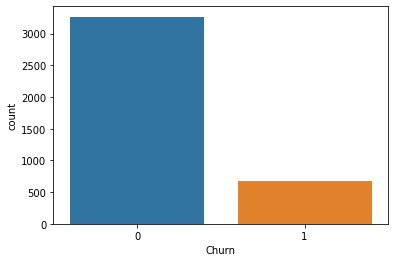

0    0.828977
1    0.171023
Name: Churn, dtype: float64


In [ ]:
# Mencari apakah dataset (kolom churn) imbalanced atau tidak
sns.countplot(x='Churn',data=df)
plt.show()

persentase = df['Churn'].value_counts()/df.shape[0]
print(persentase)

> **1. Apakah dataset (kolom churn) imbalanced atau tidak?**

Ya, setelah analisa, dari hasil plot diatas menunjukkan bahwa dataset (kolom churn) tersebut memiliki persentase sebesar 83,9% : 17,1% sehingga data tersebut memiliki indikasi Imbalanced

#### **Most Churn Customer**

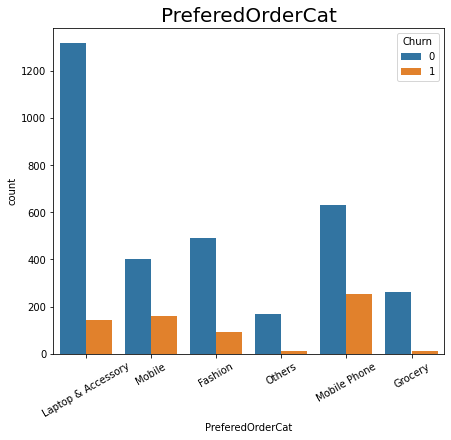

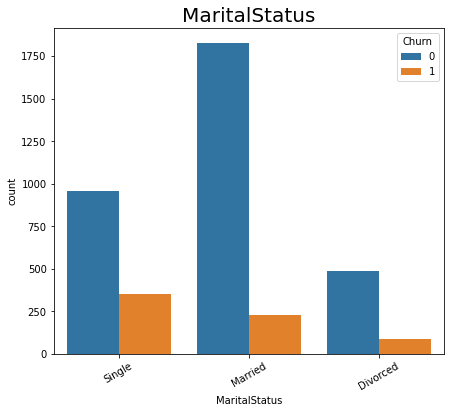

In [ ]:
# pelanggan seperti apa yang paling banyak terjadinya Churn
for a in df.describe(include='object').columns:
    plt.figure(figsize=(7,6))
    sns.countplot(x=a,data=df,hue='Churn')
    plt.title(a, fontsize=20)
    plt.xticks(rotation=30)
    plt.show()

> **2. Pelanggan seperti apa yang paling banyak Churn? (dilihat dari fitur kategorikal)**

Dari hasil plot diatas dapat dilihat bahwa pelanggan yang paling banyak Churn adalah pelanggan yang kategori pesanan pilihannya pada bulan sebelumnya (PreferedOrderCat) adalah  **Mobile Phone** dan juga pelanggan yang statusnya (MaritalStatus) masih single.

Kita juga bisa melihat bahwa 2 kolom kategorikal ini bukan sebagai data kategori ordinal sehingga untuk melakukan encoding dapat menggunakan **one hot encoding dan juga binary encoding**

#### **Data Distribution**

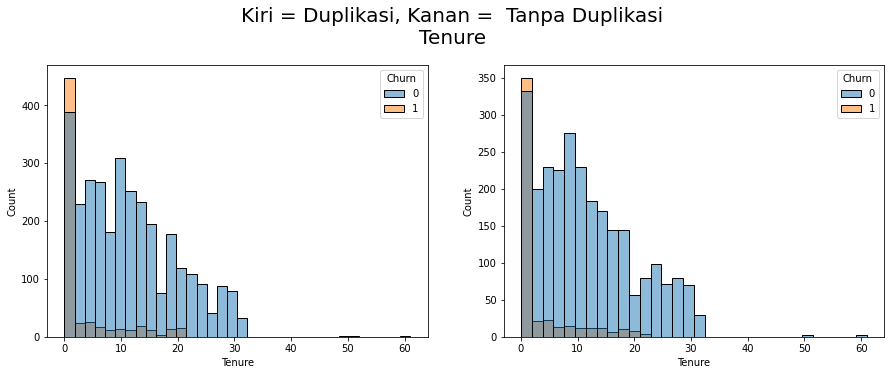

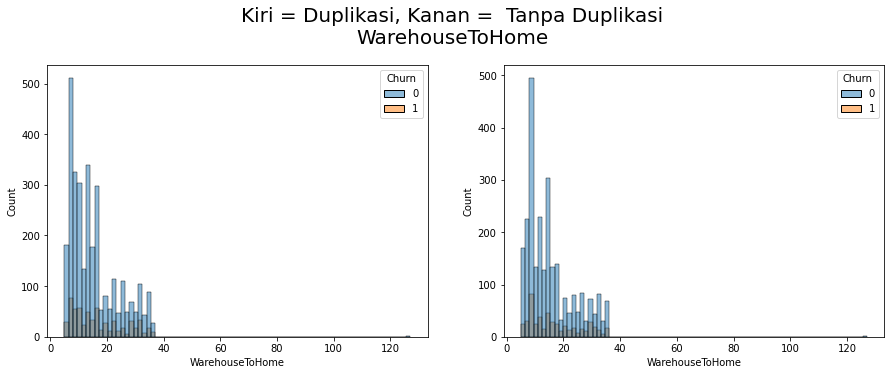

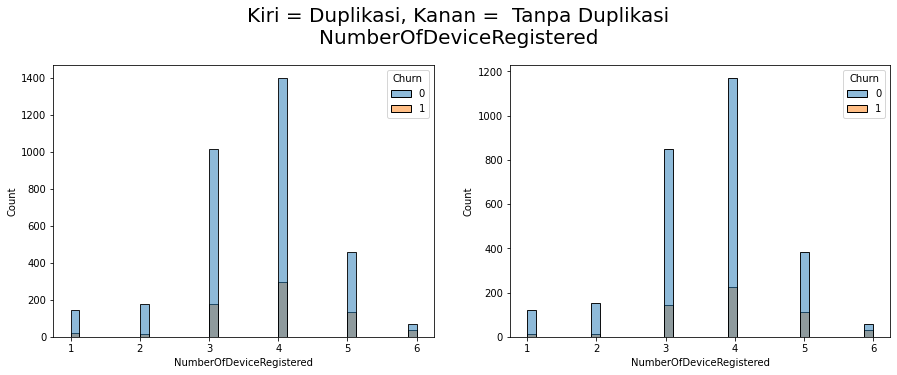

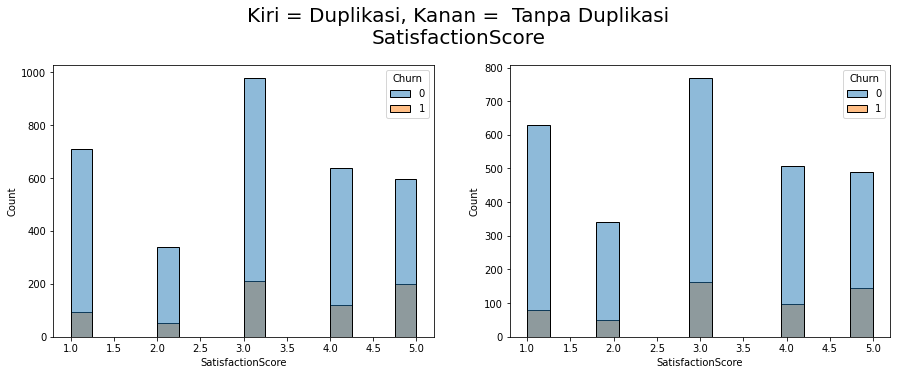

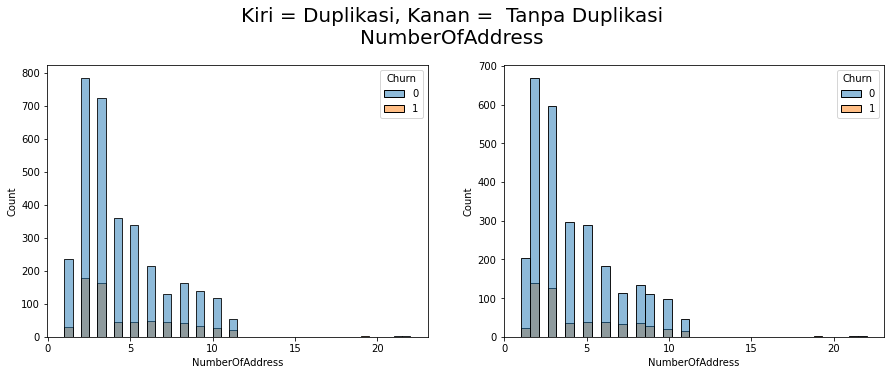

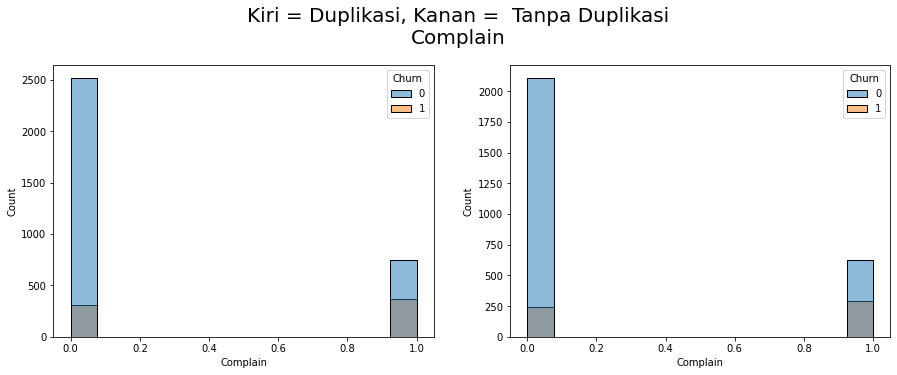

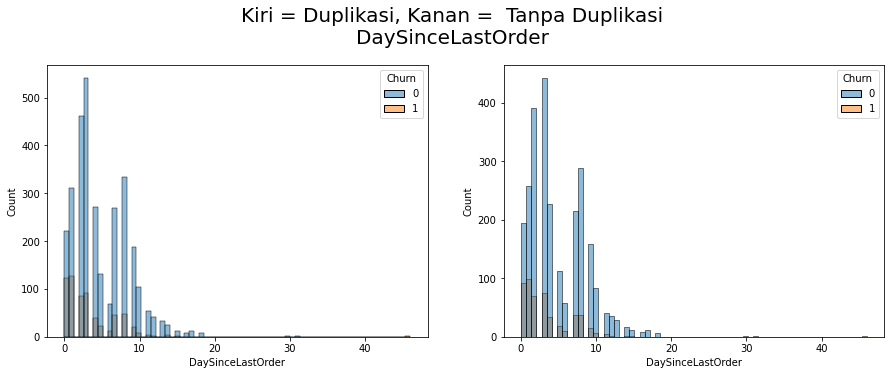

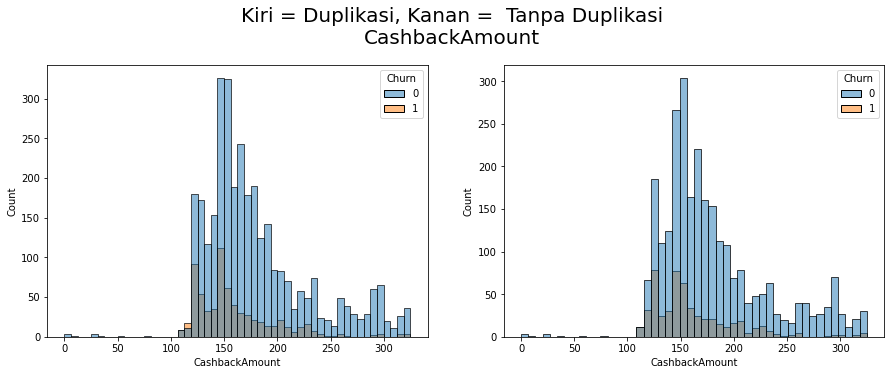

In [ ]:
# mencari perbedaan distribusi antara data dengan duplikat atau tidak
for a in df.describe(exclude='object').columns[:-1]:
  fig, axes = plt.subplots(1, 2, figsize=(15,5))
  plt.text(.5, 1, 'Kiri = Duplikasi, Kanan =  Tanpa Duplikasi', transform=fig.transFigure, horizontalalignment='center',fontsize=20)
  plt.suptitle(a, fontsize=20)
  sns.histplot(data=df, x=a, hue='Churn', ax=axes[0])
  sns.histplot(data=df.drop_duplicates(subset=None, keep='first'),x=a,hue='Churn',ax=axes[1])
  plt.show()

> **3. Karena pada tahap Data Exploration 1 kita mengetahui adanya data yang duplikat, maka kita akan membandingkan distribusi data antara data dengan duplikasi dan tidak memiliki perbedaan?**

* Kita melihat dari plot-plot diatas bahwa distribusi dataset setelah data duplikat dihapus mengalami sedikit perubahan.
* kemudian kita juga bisa melihat data yang memiliki distribusi roght skewed yaitu:
  * NumberOfAddress
  * DaySinceLastOrder
  * CashbackAmount
  * Tenure
  * WarehouseToHome

#### **Outlier**

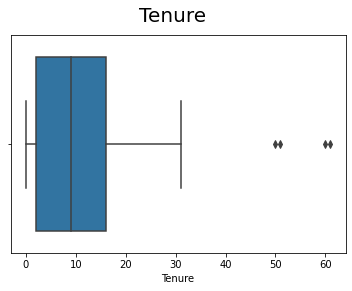

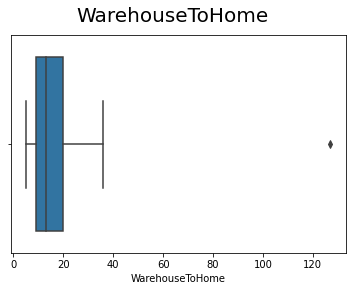

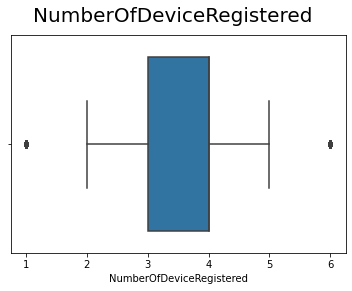

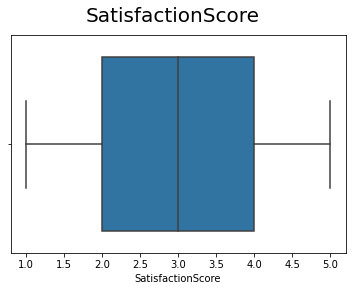

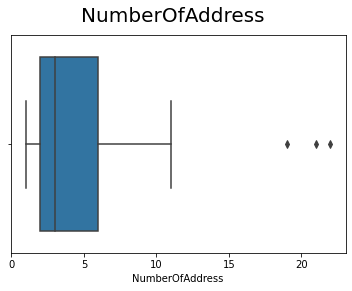

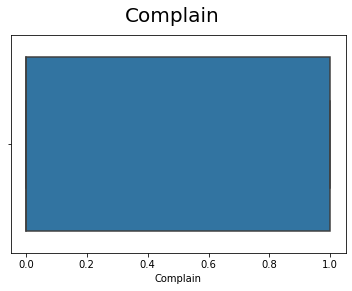

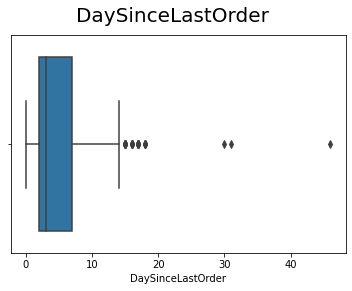

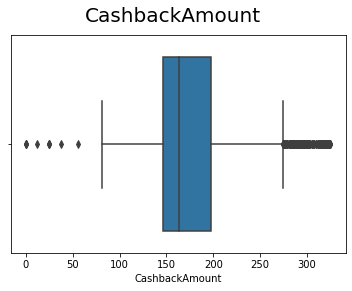

In [ ]:
# mencari Kolom yang memiliki outlier
for a in df.describe(exclude='object').columns[:-1]:
  plt.suptitle(a, fontsize=20)
  sns.boxplot(data=df.drop_duplicates(subset=None, keep='first'),x=a,hue='Churn')
  plt.show()

> **4. Apakah ada fitur yang memiliki data outlier?**

Setelah kita lakukan analisa, plot-plot diatas menunjukkan ada beberapa fitur yang memiliki data outlier, yaitu:
  * Tenure
  * WarehouseToHome
  * NumberOfDeviceRegistered
  * NumberOfAddress
  * DaySinceLastOrder
  * CashbackAmount

#### **Predictor Feature**

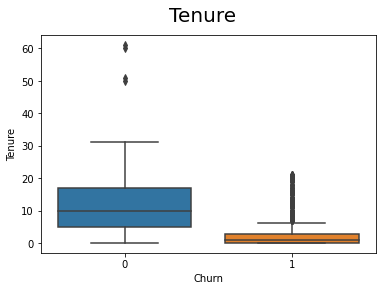

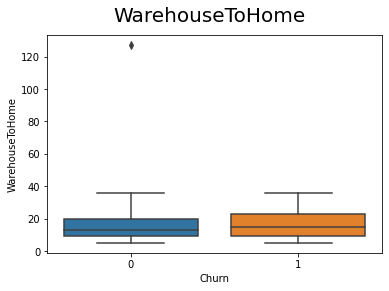

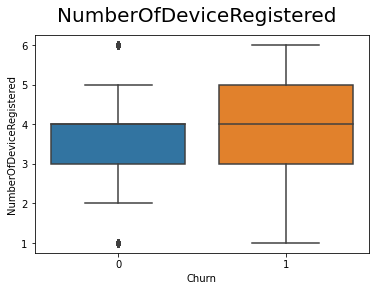

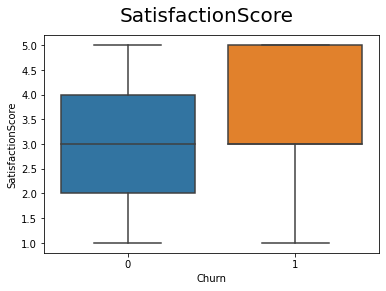

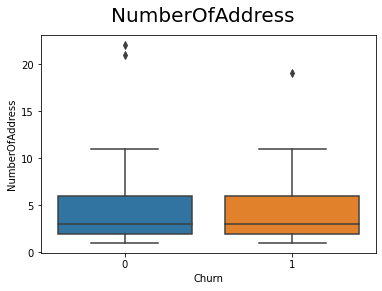

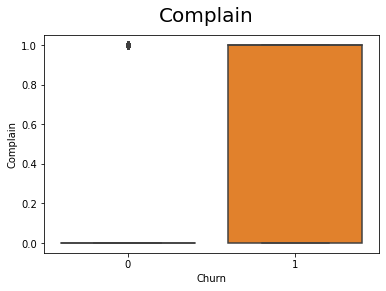

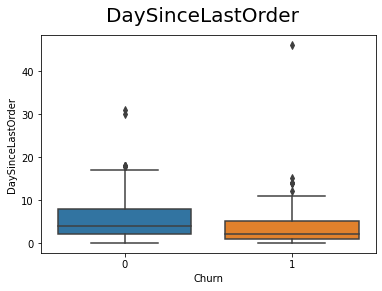

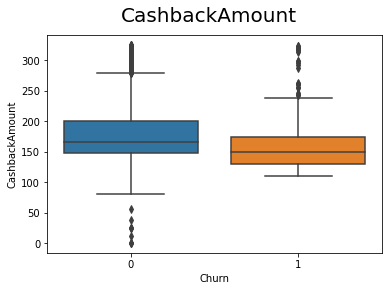

In [ ]:
# Mencari fitur apa saja yang kemungkinan menjadi prediktor yang baik
for a in df.describe(exclude='object').columns[:-1]:
    plt.suptitle(a, fontsize=20)
    sns.boxplot(data=df, y=a, x='Churn')
    plt.show()

> **5. Fitur apa saja yang kemungkinan menjadi prediktor yang baik?**

Bisa dilihat, ada beberapa fitur yang kemungkinan dapat menjadi prediktor yang baik, yaitu:
* Tenure
* NumberOfDeciveRegistered
* SatisfactionScore
* Complain
* CashbackAmount

#### **Correlation**

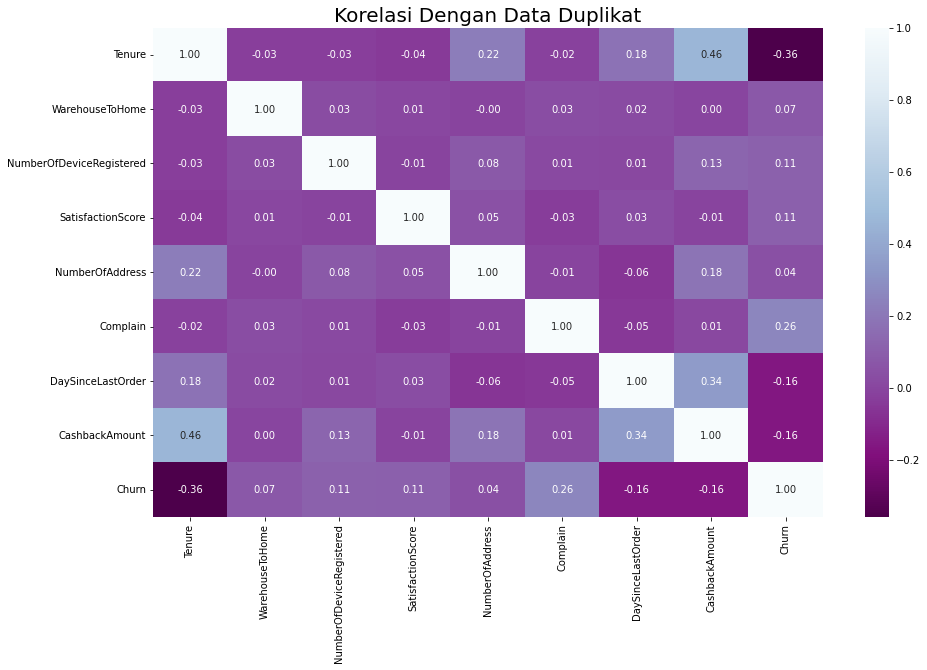

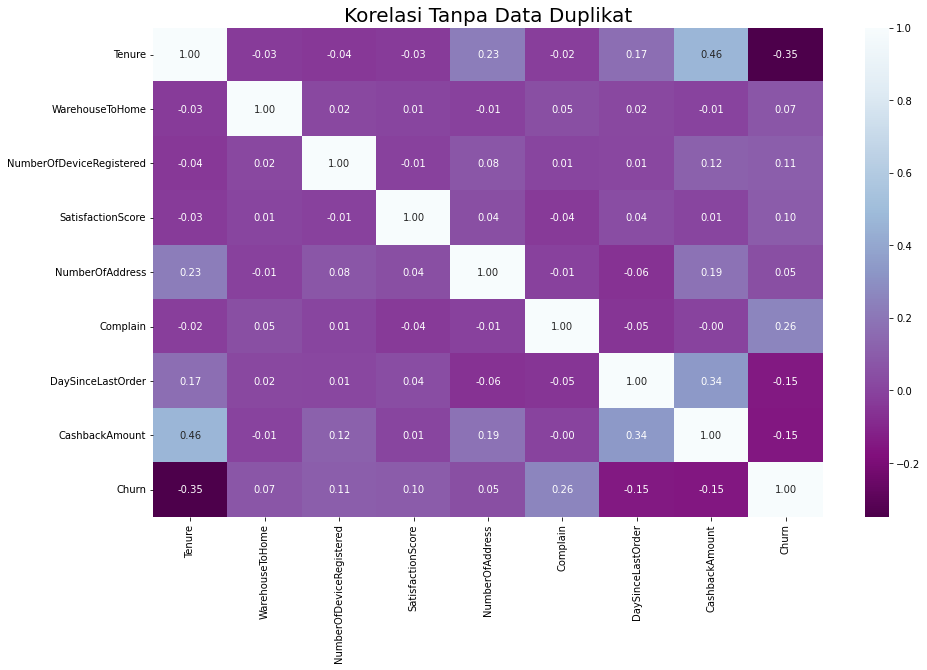

In [ ]:
# Melihat korelasi dataset
df_dengan_dup = df.corr(method='pearson')
df_tanpa_dup = df.drop_duplicates(subset=None, keep='first').corr(method='pearson')

plt.figure(figsize=(15,9))
sns.heatmap(data=df_dengan_dup, annot=True, fmt='.2f',cmap='BuPu_r')
plt.title('Korelasi Dengan Data Duplikat', fontsize=20)
plt.show()

plt.figure(figsize=(15,9))
sns.heatmap(data=df_tanpa_dup, annot=True, fmt='.2f', cmap='BuPu_r')
plt.title('Korelasi Tanpa Data Duplikat', fontsize=20)
plt.show()

> **6. Fitur apa saja yang memiliki korelasi paling tinggi pada target?** 

Kita bisa melihat bahwa korelasi tertinggi terdapat pada fitur **Tenure** sehingga fitur tersebut menjadi prediktor terbaik. Selain itu pada korelasi data dengan duplikat atau tanpa duplikat tidak adanya perubahan yang signifikan.

#### **Summary Data Exploration 2**

1. Dari hasil plot menunjukkan bahwa dataset (kolom churn) memiliki persentase sebesar 83,9% : 17,1% sehingga data tersebut memiliki indikasi Imbalanced.
1. Dari hasil plot dapat dilihat bahwa 
  * pelanggan yang paling banyak Churn adalah pelanggan yang kategori pesanan pilihannya pada bulan sebelumnya (PreferedOrderCat) adalah Mobile Phone dan juga pelanggan yang statusnya (MaritalStatus) masih single.
  * Kita juga bisa melihat bahwa 2 kolom kategorikal ini bukan sebagai data kategori ordinal sehingga untuk melakukan encoding dapat menggunakan one hot encoding dan juga binary encoding
1. Kita melihat dari plot-plot bahwa
  * Distribusi dataset setelah data duplikat dihapus mengalami sedikit perubahan.
  * kemudian kita juga bisa melihat data yang memiliki distribusi roght skewed yaitu:
    * NumberOfAddress
    * DaySinceLastOrder
    * CashbackAmount
    * Tenure
    * WarehouseToHome
1. Setelah kita lakukan analisa, menunjukkan ada beberapa fitur yang memiliki data outlier, yaitu:
  * Tenure
  * WarehouseToHome
  * NumberOfDeviceRegistered
  * NumberOfAddress
  * DaySinceLastOrder
  * CashbackAmount
1. Ada beberapa fitur yang kemungkinan dapat menjadi prediktor yang baik, yaitu:
  * Tenure
  * NumberOfDeciveRegistered
  * SatisfactionScore
  * Complain
  * CashbackAmount
1. Korelasi tertinggi terdapat pada fitur **Tenure** sehingga fitur tersebut menjadi prediktor terbaik. Selain itu pada korelasi data dengan duplikat atau tanpa duplikat tidak adanya perubahan yang signifikan.

## **Data Cleaning**

### **Drop Duplicate Data**

Sebelumnya pada **Data Exploration 1** kita mengetahui bahwa ada **671 data duplikat**. Data-data tersebut akan kita hapus terlebih dahulu agar dataset yang kita miliki menjadi lebih baik.

In [ ]:
df.shape

(3941, 11)

In [ ]:
df = df.drop_duplicates(subset=None, keep='first').reset_index(drop=True)
df.shape

(3270, 11)

### **Missing Value**

Sebelumnya kita sudah melakukan kegiatan **Data Understanding** selanjutnya kita akan melakukan pembersihan dataset terhadap missing value. Namun, sebelum itu kita harus mengetahui karakteristik dari missing value yang ada pada dataset.

In [ ]:
# melihat jumlah data kosong pada dataset
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique()]);

dfDesc = pd.DataFrame(columns=['Fitur', 'Tipe Data', 'Data NaN', '% Data kosong', 'Jumlah Unik'],
                     data=listItem)
dfDesc

,Fitur,Tipe Data,Data NaN,% Data kosong,Jumlah Unik
0,Tenure,float64,160,4.89,36
1,WarehouseToHome,float64,135,4.13,33
2,NumberOfDeviceRegistered,int64,0,0.00,6
3,PreferedOrderCat,object,0,0.00,6
4,SatisfactionScore,int64,0,0.00,5
5,MaritalStatus,object,0,0.00,3
6,NumberOfAddress,int64,0,0.00,14
7,Complain,int64,0,0.00,2
8,DaySinceLastOrder,float64,181,5.54,22
9,CashbackAmount,float64,0,0.00,2335


Sebenarnya kita sudah mengetahui adanya missing value melalui barplot sebelumnya. Namun, kita masih belum mengetahui secara pasti berapa jumlah missing value yang dimiliki setiap kolom sehingga dengan tabel diatas telah memperjelas jumlah missing value-nya ada berapa. Kolom-kolom yang memiliki missing value yaitu:
* 'DaySinceLastOrder'
* 'Tenure'
* 'WarehouseToHome'

Selanjutnya kita akan menggunakan beberapa metode imputer untuk membandingkan nilai mean dan standar deviasi setiap metode imputer. Kemudian metode yang dipilih adalah metode yang nilai mean dan standar deviasinya mendekati populasi sebelum data dilakukan imputer. Metode imputer yang akan kita gunakan ada 3 yaitu: 
1. Simple imputer (mean)
1. KNN Imputer (n_neighbour 3)
1. Iterative Imputer (MICE)

In [ ]:
def missing_value(a):
    kolom_misval = ['DaySinceLastOrder', 'Tenure', 'WarehouseToHome']
    df_new = df.copy()
    if a == 'mean':
        imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
    elif a == 'knn':
        imputer = KNNImputer(n_neighbors=3)
    elif a == 'mica':
        imputer = IterativeImputer(random_state=0)

    # Fit Transform
    imputer.fit(df_new[kolom_misval])
    imputer = imputer.transform(df_new[kolom_misval])
    
    df_new_2 = pd.DataFrame(columns = kolom_misval, data = imputer)
    df_new[kolom_misval] = imputer
    
    return df_new

In [ ]:
# dataframe
missing_kolom = ['DaySinceLastOrder', 'Tenure', 'WarehouseToHome']
df_new = df.copy()

# SI
df_si = missing_value('mean')

# KNN
df_knn = missing_value('knn')

# MICE
df_mica = missing_value('mica')

In [ ]:
# Recalculate
def kalkulasi(df, metrik):
    if metrik == 'std':
        return round(df['DaySinceLastOrder'].std(), 2), round(df['Tenure'].std(), 2), round(df['WarehouseToHome'].std(), 2)
    else:
        return round(df['DaySinceLastOrder'].mean(), 2), round(df['Tenure'].mean(), 2), round(df['WarehouseToHome'].mean(), 2)

In [ ]:
# Calculate standard with missing value
day_last_mean = round(df_new['DaySinceLastOrder'].mean(), 2)
day_las_std = round(df_new['DaySinceLastOrder'].std(), 2)

tenure_mean = round(df_new['Tenure'].mean(), 2)
tenure_std = round(df_new['Tenure'].std(), 2)

warehouse_mean = round(df_new['WarehouseToHome'].mean(), 2)
warehouse_std = round(df_new['WarehouseToHome'].std(), 2)

In [ ]:

# MEAN
day_last_mean_si, tenure_mean_si, warehouse_mean_si = kalkulasi(df_si, 'mean')
day_last_std_si, tenure_std_si, warehouse_std_si = kalkulasi(df_si, 'std')

# KNN
day_last_mean_knn, tenure_mean_knn, warehouse_mean_knn = kalkulasi(df_knn, 'mean')
day_las_std_knn, tenure_std_knn, warehouse_std_knn = kalkulasi(df_knn, 'std')

# MICA
day_last_mean_mica, tenure_mean_mica, warehouse_mean_mica = kalkulasi(df_mica, 'mean')
day_last_mean_mica, tenure_mean_mica, warehouse_mean_mica = kalkulasi(df_mica, 'std')

In [ ]:
df_perbandingan = pd.DataFrame(columns = ['Kolom', 'Metode Imputer', 'Nilai Mean Awal', 'Nilai Mean Akhir', 'Nilai Std Awal', 'NIlai Std Akhir'],
                       data = [['DaySinceLastOrder', 'Simple Imputer', day_last_mean, day_last_mean_si, day_las_std, day_last_std_si], 
                               ['Tenure', 'Simple Imputer', tenure_mean, tenure_mean_si, tenure_std, tenure_std_si], 
                               ['WarehouseToHome', 'Simple Imputer', warehouse_mean, warehouse_mean_si, warehouse_std, warehouse_std_si],
                               
                               ['DaySinceLastOrder', 'KNN Imputer', day_last_mean, day_last_mean_knn, day_las_std, day_las_std_knn], 
                               ['Tenure', 'KNN Imputer', tenure_mean, tenure_mean_knn, tenure_std, tenure_std_knn], 
                               ['WarehouseToHome', 'KNN Imputer', warehouse_mean, warehouse_mean_knn, warehouse_std, warehouse_std_knn],
                               
                               ['DaySinceLastOrder', 'Iterative Imputer', day_last_mean, day_last_mean_mica, day_las_std, day_last_mean_mica], 
                               ['Tenure', 'Iterative Imputer', tenure_mean, tenure_mean_mica, tenure_std, tenure_mean_mica], 
                               ['WarehouseToHome', 'Iterative Imputer', warehouse_mean, warehouse_mean_mica, warehouse_std, warehouse_mean_mica]])

display(df_perbandingan.set_index('Metode Imputer'))

,Kolom,Nilai Mean Awal,Nilai Mean Akhir,Nilai Std Awal,NIlai Std Akhir
Metode Imputer,,,,,
Simple Imputer,DaySinceLastOrder,4.55,4.55,3.70,3.59
Simple Imputer,Tenure,10.19,10.19,8.65,8.44
Simple Imputer,WarehouseToHome,15.51,15.51,8.57,8.39
KNN Imputer,DaySinceLastOrder,4.55,4.44,3.70,3.64
KNN Imputer,Tenure,10.19,10.06,8.65,8.52
KNN Imputer,WarehouseToHome,15.51,15.40,8.57,8.46
Iterative Imputer,DaySinceLastOrder,4.55,3.60,3.70,3.60
Iterative Imputer,Tenure,10.19,8.44,8.65,8.44
Iterative Imputer,WarehouseToHome,15.51,8.39,8.57,8.39


Kita sudah melakukan percobaan dengan beberapa metode imputer dan apabila dlihat dari tabel diatas dapat dilihat metode Simple Imputer adalah metode yang mendekati distribusi asli dataset dengan missing value. Dengan begitu, Simple Imputer adalah metode yang akan digunakan untuk missing value.

In [ ]:
display(df_si.shape, df_si.head())

(3270, 11)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.000000,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.000000,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.000000,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,4.545484,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.000000,322.17,0


### **Outlier**

Sebelumnya kita telah mengetahui adanya kolom kolom yang memiliki data outlier. Kolom-kolom tersebut adalah 
  * Tenure
  * WarehouseToHome
  * NumberOfDeviceRegistered
  * NumberOfAddress
  * DaySinceLastOrder
  * CashbackAmount

Kita akan menangani kolom kolom tersebut dengan menghitung junlah data outlier. Selanjutnya apabila jumlah data outlier sedikit maka kita akan menghapus data tersebut, namun apabila data outlier yang terdeteksi banyak kita tidak akan menghapus data tersebut karena nanti akan membuat data yang digunakan untuk training dan testing akan sedikit.

In [ ]:
kolom_outlier = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
                 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']

def outlier(df, a):
    upper = []
    lower = []
    
    # IQR
    Q1 = df.describe()[a]['25%']
    Q3 = df.describe()[a]['75%']
    min = df.describe()[a]['min']
    max = df.describe()[a]['max']
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR

    print(f'Data awal: {df.shape}')

    if max > upper_bound:
        upper = list(np.where(df[a] >= upper_bound)[0])
    else:
        upper_bound = max
    if min < lower_bound:
        lower = list(np.where(df[a] <= lower_bound)[0])
    else:
        lower_bound = min

    upper.extend(lower)
    df.drop(upper, inplace = True)
    
    print(f'Data akhir: {df.shape}\n')
    return df.reset_index(drop=True)

df_outlier = df.copy()
for i, a in enumerate(kolom_outlier):
    print(f'Kolom {a}:')
    df_outlier = outlier(df_outlier, a)

print(f'Jumlah dataset awal : {df_raw.shape}')
print(f'Jumlah dataset tanpa data duplikat: {df.shape}')
print(f'Jumlah dataset tanpa data duplikat dan outlier: {df_outlier.shape}')

Kolom Tenure:
Data awal: (3270, 11)
Data akhir: (3266, 11)

Kolom WarehouseToHome:
Data awal: (3266, 11)
Data akhir: (3265, 11)

Kolom NumberOfDeviceRegistered:
Data awal: (3265, 11)
Data akhir: (3040, 11)

Kolom NumberOfAddress:
Data awal: (3040, 11)
Data akhir: (3037, 11)

Kolom DaySinceLastOrder:
Data awal: (3037, 11)
Data akhir: (2998, 11)

Kolom CashbackAmount:
Data awal: (2998, 11)
Data akhir: (2771, 11)

Jumlah dataset awal : (3941, 11)
Jumlah dataset tanpa data duplikat: (3270, 11)
Jumlah dataset tanpa data duplikat dan outlier: (2771, 11)


Kegiatan kita disebelumnya telah merubah banyak data yang ada didataset, sehingga membuat dataset yang awalnya berjumlah 3.941 data menjadi 2.771 data apabila data duplikat dan data outliernya dihapus. Karena data yang berkurang sangat banyak yang nantinya tidak baik apabila digunakan training dan testing maka **data outlier tidak akan kita hapus**. Sehingga data yang akan kita gunakan adalah dataset yang tidak memiliki data duplikat, yaitu sebanyak **3.270 data**.

In [ ]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.000000,3135.000000,3270.000000,3270.000000,3270.000000,3270.000000,3089.000000,3270.000000,3270.000000
mean,10.190354,15.510367,3.676453,3.020795,4.222936,0.281651,4.545484,177.417670,0.163303
std,8.650821,8.568382,1.017390,1.395113,2.623195,0.449873,3.696022,49.310647,0.369698
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.892500,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.885000,0.000000
75%,16.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.137500,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


## **Data Preparation**

### **Data Splitting**

Pada proses data splitting ini kita akan membagi dataset menjadi 2 bagian yaitu data untuk training dan data untuk testing. Pembagian data tersebut kita atur sebesar 80% data untuk data training dan 20% data untuk data testing.

Namun, sebelum melakukan pembagian data tersebut kita akan mengisi terlebih dahulu data yang kosong pada kolom: 
* 'Tenure'
* 'WarehouseToHome'
* 'DaySinceLastOrder'

kita juga akan melakukan encoding terhadap 2 kolom kategorikal yaitu: 
* 'PreferedOrderCat'
* 'MaritalStatus'

In [ ]:
# df_no_misval = df_si.copy()
# df = df_new.copy()
df_no_misval = df_si.copy()
df = df_si.copy()

In [ ]:
encoding_kolom = ['PreferedOrderCat', 'MaritalStatus']
misval_kolom = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

onehot = OneHotEncoder(drop='first')
Imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

preprocessor = ColumnTransformer([
    ('misval', Imputer, misval_kolom),
    ('encode', onehot, encoding_kolom),], remainder='passthrough')

x = df.drop(columns=['Churn'])
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=2022)

## **Modeling & Evaluation**

Selanjutnya kita akan memulai tahap pembuatan model machine learning. Pembuatan model ini kita akan menggunakan beberapa metode dengan parameter defaultnya. Ada 8 metode yang akan kita coba yaitu :
1. Logistic Regression
1. KNeighbours Classifier
1. Decision Tree Classifier
1. Random Forest Classifier
1. XGB Classifier
1. LGBM Classifier
1. Cat Boost Classifier
1. Ada Boost Classifier

In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dec_tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(verbosity=0, silent=True)
lgbm = lgb.LGBMClassifier()
catb = CatBoostClassifier(silent=True)
adab = AdaBoostClassifier()

model = [logreg, knn, dec_tree, rf, xgb, lgbm, catb, adab]
algo = ['Logistic Regression', 'KNN', 'Decision Tree', 'RF', 'XGBoost', 'LightGBM', 'Catboost', 'Adaboost']

### **Model Benchmarking : K-Fold**

In [ ]:
score = []
average = []
std_dev = []

for a in model:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])
    
    model_cv = cross_val_score(pipeline_model, x_train, y_train,
                               cv=sk_fold, scoring='roc_auc')
    
    score.append([round(i, 2) for i in model_cv])
    average.append(model_cv.mean())
    std_dev.append(model_cv.std())
    
# df_default_train = 
pd.DataFrame(data={'Model': algo,
                   'Mean ROC AUC': average,
                   'Std ROC AUC': std_dev}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

,Mean ROC AUC,Std ROC AUC
Model,,
Catboost,0.937393,0.014324
LightGBM,0.932907,0.014116
RF,0.922544,0.018259
XGBoost,0.917281,0.014212
Adaboost,0.898972,0.017686
Logistic Regression,0.873508,0.016735
KNN,0.778317,0.032686
Decision Tree,0.770497,0.037284


Kita sudah melakukan percobaan kepada beberapa metode, dengan menggunakan default hyperparameter. Tabel diatas memperlihatkan bahwa metode **Cat Boost Classifier (CatBoost) dan  Light GBM (LightGBM)memiliki skor ROC AUC tertinggi** dibandingkan dengan metode-metode yang lain. 

### **Model Benchmarking : Data Testing**

In [ ]:
roc_auc = []
recall = []
confus_matrix = []
fpr = []

for i, a in enumerate(model):    
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])
    
    pipeline_model.fit(x_train, y_train)
    
    y_pred = pipeline_model.predict(x_test)
    y_pred_proba = pipeline_model.predict_proba(x_test)[:,1]
    confmat_var = confusion_matrix(y_test, y_pred)
    
    roc_auc.append(roc_auc_score(y_test, y_pred_proba))
    recall.append(recall_score(y_test, y_pred))
    confus_matrix.append(confmat_var)
    fpr.append(confmat_var[0][1]/(confmat_var[0][1]+confmat_var[0][0]))
    print(a,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame(data={'Model': algo,
                   'ROC AUC Score': roc_auc,
                   'Recall Score': recall,
                   'FPR': fpr,}).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression() 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       547
           1       0.66      0.45      0.53       107

    accuracy                           0.87       654
   macro avg       0.78      0.70      0.73       654
weighted avg       0.86      0.87      0.86       654

KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       547
           1       0.68      0.44      0.53       107

    accuracy                           0.87       654
   macro avg       0.79      0.70      0.73       654
weighted avg       0.86      0.87      0.86       654

DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       547
           1       0.59      0.69      0.64       107

    accuracy                           0.87       654
   macro avg       0.76      0.80      0.78       654

,ROC AUC Score,Recall Score,FPR
Model,,,
Catboost,0.944421,0.691589,0.036563
LightGBM,0.941089,0.691589,0.029250
RF,0.933794,0.588785,0.032907
XGBoost,0.916383,0.551402,0.038391
Adaboost,0.887381,0.504673,0.047532
Logistic Regression,0.871431,0.448598,0.045704
KNN,0.812187,0.439252,0.040219
Decision Tree,0.798262,0.691589,0.095064


Kita sudah melakukan Testing Dataset dan terlihat lagi bahwa metode dengan menggunakan Random Forest Classifier (RF) memiliki performa terbaik dibandingkan dengan metode yang lain pada test data. 

Namun perlu dilihat juga bahwa metode Random Forest Classifier (RF) & Cat Boost Classifier (CatBoost) memiliki nilai False Positive Rate (FPR) yang sama sama tinggi yaitu 3,6%. Sedangkan metode Light GBM (LightGBM)  dengan nilai False Positive Rate (FPR) sebesar 2,9% merupakan yang terendah diantara metode yang lainnya.

Jika kita bandingkan ketiga metode tersebut (RF, CatBoost, LightGBM) maka metode dengan menggunakan **Light GBM merupakan yang paling baik karena memiliki False Positive Rate (FPR) terendah (2,9%) tapi memiliki nilai ROC AUC yang juga tinggi, tidak terlalu jauh dengan metode Random Forest Classifier (RF) & Cat Boost Classifier (CatBoost). Dimana ketiga metode tersebut memiliki nilai ROC AUC sebesar 94% (RF = 94,9%, CatBoost = 94,4%, LightGBM = 94,1%)**. Tidak lupa juga bahwa nilai Racall metode LightGBM juga merupakan yang tertinggi (69,1%) bersama dengan CatBoost.

Sehingga metode pembuatan model dengan LightGBM adalah yang paling baik diantara metode yang lainnya. Selanjutnya kita akan melakukan test oversampling untuk metode Light GBM (LighGBM) guna melihat apakah kita akan mendapatkan hasil yang lebih baik.

### **Oversampling Test**

Sebelumnya kita mengetahui bahwa dataset (churn) memiliki indikasi imbalanced, sehingga model akan cenderung memprediksi kearah tidak churn (0). Kemudian dikarenakan total data yang dimiliki sedikit, sekitar 3000 data, maka metode yang tepat adalah oversampling.

Kita akan membagi terlebih dahulu dataset yang kita miliki menjadi 2 bagian yaitu data untuk training dan juga data untuk testing. Selanjutnya kita akan melakukan Oversampling pada data training dan testing. Metode uji coba sampling yang akan digunakan adalah **SMOTENC**.

In [ ]:
print(f'Ukuran dataset: {df.shape}')
display(df['Churn'].value_counts())
display((df['Churn'].value_counts()/df.shape[0])*100)

Ukuran dataset: (3270, 11)


0    2736
1     534
Name: Churn, dtype: int64

0    83.669725
1    16.330275
Name: Churn, dtype: float64

In [ ]:
x_no_misval = df_no_misval.drop(columns=['Churn'])
y_no_misval = df_no_misval['Churn']

x_sampling, x_test_sampling, y_sampling, y_test_sampling = train_test_split(x_no_misval,
                                                                        y_no_misval, 
                                                                        stratify=y_no_misval,
                                                                        test_size=0.2,
                                                                        random_state=2022)

In [ ]:

# training
score = []
score_avg = []
std = []

sampling = SMOTENC(categorical_features=[3, 5], random_state=42)

x_train_sampling, y_train_sampling = sampling.fit_resample(x_sampling, y_sampling)

# Training w/ balanced dataset
for a in model:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])

    model_cv=cross_val_score(pipeline_model, 
                              x_train_sampling,
                              y_train_sampling,
                              cv=sk_fold,
                              scoring='roc_auc')

    score.append([round(i, 2) for i in model_cv])
    score_avg.append(model_cv.mean())
    std.append(model_cv.std())

print(f'Ukuran data training: {y_train_sampling.shape}')
display(y_train_sampling.value_counts())
display((y_train_sampling.value_counts()/y_train_sampling.shape[0])*100)
pd.DataFrame(data={'Model': algo,
                   'Mean ROC AUC': score_avg,
                   'Std ROC AUC': std,}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

Ukuran data training: (4378,)


0    2189
1    2189
Name: Churn, dtype: int64

0    50.0
1    50.0
Name: Churn, dtype: float64

,Mean ROC AUC,Std ROC AUC
Model,,
LightGBM,0.982370,0.017067
Catboost,0.979885,0.019710
RF,0.974335,0.017531
XGBoost,0.953444,0.024239
KNN,0.941304,0.013699
Adaboost,0.925405,0.027381
Decision Tree,0.880094,0.036259
Logistic Regression,0.869908,0.016499


In [ ]:
# testing
recall = []
fpr_test = []
roc_auc_test = []
confus_matrix_test = []

# Testing
for i, a in enumerate(model):
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])

    pipeline_model.fit(x_train_sampling, y_train_sampling)

    y_pred = pipeline_model.predict(x_test_sampling)
    y_pred_proba = pipeline_model.predict_proba(x_test_sampling)[:,1]
    confus_matrix_var = confusion_matrix(y_test_sampling, y_pred)

    recall.append(recall_score(y_test_sampling, y_pred))
    fpr_test.append(confus_matrix_var[0][1]/(confus_matrix_var[0][1]+confus_matrix_var[0][0]))
    roc_auc_test.append(roc_auc_score(y_test_sampling, y_pred_proba))
    confus_matrix_test.append(confus_matrix_var)
    print(a,'\n', classification_report(y_test,y_pred))

print(f'Ukuran data testing: {y_test_sampling.shape}')
display(y_test_sampling.value_counts())
display((y_test_sampling.value_counts()/y_test_sampling.shape[0])*100)

pd.DataFrame(data={'Model': algo,
                   'ROC AUC Score': roc_auc_test,
                   'Recall Score': recall,
                   'FPR': fpr_test,}).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression() 
               precision    recall  f1-score   support

           0       0.95      0.76      0.84       547
           1       0.39      0.81      0.53       107

    accuracy                           0.76       654
   macro avg       0.67      0.78      0.69       654
weighted avg       0.86      0.76      0.79       654

KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       0.95      0.76      0.84       547
           1       0.39      0.79      0.52       107

    accuracy                           0.76       654
   macro avg       0.67      0.77      0.68       654
weighted avg       0.86      0.76      0.79       654

DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       547
           1       0.54      0.73      0.62       107

    accuracy                           0.85       654
   macro avg       0.74      0.80      0.77       654

0    547
1    107
Name: Churn, dtype: int64

0    83.639144
1    16.360856
Name: Churn, dtype: float64

,ROC AUC Score,Recall Score,FPR
Model,,,
LightGBM,0.930581,0.747664,0.063985
Catboost,0.929351,0.757009,0.063985
RF,0.927771,0.766355,0.078611
XGBoost,0.898922,0.719626,0.113346
Adaboost,0.872636,0.738318,0.184644
Logistic Regression,0.845530,0.813084,0.244973
KNN,0.833382,0.785047,0.241316
Decision Tree,0.804157,0.728972,0.120658


Setelah dilakukan uji coba Oversampling, model yang telah dibuat memiliki indikasi Overfitting karena perbedaan hasil training dan testing yang telah dilakukan terlalu jauh. 

Kita akan mencoba melakukan uji coba Undersampling lalu akan kita lihat perbedaan dari hasil uji coba Oversampling dengan uji coba Undersampling.

### **Undersampling Test**

In [ ]:

# training
score = []
score_avg = []
std = []

sampling = RandomUnderSampler(sampling_strategy='majority')

x_train_sampling, y_train_sampling = sampling.fit_resample(x_sampling, y_sampling)

# Training w/ balanced dataset
for a in model:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])

    model_cv=cross_val_score(pipeline_model, 
                              x_train_sampling,
                              y_train_sampling,
                              cv=sk_fold,
                              scoring='roc_auc')

    score.append([round(i, 2) for i in model_cv])
    score_avg.append(model_cv.mean())
    std.append(model_cv.std())

print(f'Ukuran data training: {y_train_sampling.shape}')
display(y_train_sampling.value_counts())
display((y_train_sampling.value_counts()/y_train_sampling.shape[0])*100)
pd.DataFrame(data={'Model': algo,
                   'Mean ROC AUC': score_avg,
                   'Std ROC AUC': std,}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

Ukuran data training: (854,)


0    427
1    427
Name: Churn, dtype: int64

0    50.0
1    50.0
Name: Churn, dtype: float64

,Mean ROC AUC,Std ROC AUC
Model,,
Catboost,0.925490,0.016584
LightGBM,0.919197,0.021362
RF,0.918846,0.020448
XGBoost,0.911586,0.015130
Adaboost,0.894470,0.017117
Logistic Regression,0.870843,0.017544
Decision Tree,0.812695,0.024774
KNN,0.781209,0.019491


In [ ]:
# testing
recall = []
fpr_test = []
roc_auc_test = []
confus_matrix_test = []

# Testing
for i, a in enumerate(model):
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])

    pipeline_model.fit(x_train_sampling, y_train_sampling)

    y_pred = pipeline_model.predict(x_test_sampling)
    y_pred_proba = pipeline_model.predict_proba(x_test_sampling)[:,1]
    confus_matrix_var = confusion_matrix(y_test_sampling, y_pred)

    recall.append(recall_score(y_test_sampling, y_pred))
    fpr_test.append(confus_matrix_var[0][1]/(confus_matrix_var[0][1]+confus_matrix_var[0][0]))
    roc_auc_test.append(roc_auc_score(y_test_sampling, y_pred_proba))
    confus_matrix_test.append(confus_matrix_var)
    print(a,'\n', classification_report(y_test,y_pred))

print(f'Ukuran data testing: {y_test_sampling.shape}')
display(y_test_sampling.value_counts())
display((y_test_sampling.value_counts()/y_test_sampling.shape[0])*100)

pd.DataFrame(data={'Model': algo,
                   'ROC AUC Score': roc_auc_test,
                   'Recall Score': recall,
                   'FPR': fpr_test,}).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression() 
               precision    recall  f1-score   support

           0       0.96      0.77      0.85       547
           1       0.41      0.82      0.55       107

    accuracy                           0.78       654
   macro avg       0.69      0.80      0.70       654
weighted avg       0.87      0.78      0.80       654

KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       547
           1       0.38      0.76      0.50       107

    accuracy                           0.76       654
   macro avg       0.66      0.76      0.67       654
weighted avg       0.85      0.76      0.78       654

DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.96      0.76      0.85       547
           1       0.41      0.86      0.55       107

    accuracy                           0.77       654
   macro avg       0.69      0.81      0.70       654

0    547
1    107
Name: Churn, dtype: int64

0    83.639144
1    16.360856
Name: Churn, dtype: float64

,ROC AUC Score,Recall Score,FPR
Model,,,
Catboost,0.925456,0.850467,0.164534
LightGBM,0.918596,0.878505,0.171846
RF,0.918254,0.869159,0.190128
XGBoost,0.911702,0.841121,0.177331
Adaboost,0.879359,0.813084,0.221207
Logistic Regression,0.870133,0.822430,0.228519
Decision Tree,0.807420,0.859813,0.244973
KNN,0.793624,0.757009,0.244973


Setelah kita lakukan uji coba Undersampling dan uji coba Oversampling, ternyata uji coba Undersampling memiliki performa yang lebih baik jika dibandingkan dengan uji coba Oversampling. Model tidak memiliki indikasi Overfitting karena hasil dari training dan testing tidak memiliki perbedaan nilai yang signifikan.

Dikarenakan metode yang terbaik saat Oversampling dan Undersampling secara berturut-turut adalah Light GBM (LightGBM) dan Cat Boost Classifier (CatBoost) maka kita akan mencoba untuk menggunakan 2 metode tersebut untuk membuat model. Selanjutnya kita akan membandingkan dari kedua model tersebut untuk menentukan model terbaiknya.

### **Hyperparameter Tuning**

#### **Light GBM**

In [ ]:
model_lgbm = lgb.LGBMClassifier()

hyperparam_space_lgbm=[{
    'model__max_bin': [255, 275, 300, 230],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15, 30, 40],
    'model__num_iterations':[100,75, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__random_state': [42]}]

In [ ]:
# rus = SMOTENC(categorical_features=[3, 5], random_state=42)
# x_train_fin, y_train_fin = rus.fit_resample(x_train, y_train)

# estimator = Pipeline([
#     ('preprocess', preprocessor),
#     ('model', model)])

rus = RandomUnderSampler(sampling_strategy='majority', random_state=2022)
x_train_fin, y_train_fin = rus.fit_resample(x_train, y_train)

estimator = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_lgbm)])

In [ ]:
grid = GridSearchCV(estimator, 
                    n_jobs=-1, 
                    param_grid=hyperparam_space_lgbm, 
                    scoring='roc_auc', 
                    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

grid.fit(x_train_fin, y_train_fin)
print(f'Best score: {grid.best_score_}')
print(f'Best params: {grid.best_params_}')

Best score: 0.9230201653403384
Best params: {'model__learning_rate': 0.125, 'model__max_bin': 230, 'model__min_data_in_leaf': 15, 'model__num_iterations': 100, 'model__num_leaves': 31, 'model__random_state': 42}


In [ ]:
default_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_lgbm)
])
default_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('misval', SimpleImputer(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model', LGBMClassifier())])

In [ ]:
best_model = grid.best_estimator_
best_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('misval', SimpleImputer(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.125, max_bin=230,
                                min_data_in_leaf=15, num_iterations=100,
                                random_state=42))])

In [ ]:
# Testing
y_pred_default = default_model.predict(x_test)
y_pred_proba_default = default_model.predict_proba(x_test)

y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

recall_default = recall_score(y_test, y_pred_default)
recall_tuned = recall_score(y_test, y_pred_tuned)

con_mat_default = confusion_matrix(y_test, y_pred_default)
con_mat_tuned = confusion_matrix(y_test, y_pred_tuned)

fpr_default = con_mat_default[0][1]/(con_mat_default[0][1]+con_mat_default[0][0])
fpr_tuned = con_mat_tuned[0][1]/(con_mat_tuned[0][1]+con_mat_tuned[0][0])

display(pd.DataFrame(data={'Recall': [recall_default, recall_tuned],
                           'FPR': [fpr_default, fpr_tuned],
                           'ROC AUC': [roc_auc_default, roc_auc_tuned]},
                     index=['Default Model', 'Tuned Model']))

print('ROC AUC Score Default: \n', con_mat_default)
print('\nROC AUC Score Tuned: \n', con_mat_tuned)

,Recall,FPR,ROC AUC
Default Model,0.850467,0.160878,0.905773
Tuned Model,0.859813,0.166362,0.913120


ROC AUC Score Default: 
 [[459  88]
 [ 16  91]]

ROC AUC Score Tuned: 
 [[456  91]
 [ 15  92]]


In [ ]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Model: \n', report_default)
print('Classification Report Tuned Model: \n', report_tuned)

Classification Report Default Model: 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       547
           1       0.51      0.85      0.64       107

    accuracy                           0.84       654
   macro avg       0.74      0.84      0.77       654
weighted avg       0.89      0.84      0.86       654

Classification Report Tuned Model: 
               precision    recall  f1-score   support

           0       0.97      0.83      0.90       547
           1       0.50      0.86      0.63       107

    accuracy                           0.84       654
   macro avg       0.74      0.85      0.77       654
weighted avg       0.89      0.84      0.85       654



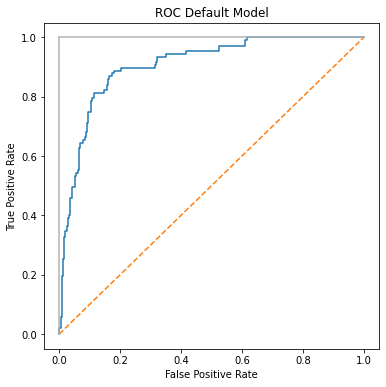

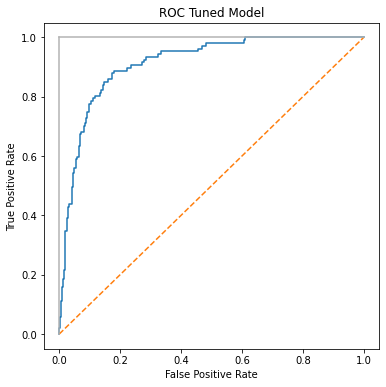

In [ ]:
def plot_auc(y_test, y_pred_proba, titles):
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[::,1])
    
    plt.subplots(1, figsize=(6,6))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.title(titles)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, y_pred_proba_default, 'ROC Default Model')
plot_auc(y_test, y_pred_proba_tuned, 'ROC Tuned Model')

#### **Cat Boost Classifier**

In [ ]:
model_catboost = CatBoostClassifier(silent=True)
hyperparam_space_catboost=[{
    'model__n_estimators' : [100, 200, 300, 400, 500],
    'model__max_depth': [i for i in range(1, 11)],
    'model__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],}]

In [ ]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state=2022)
x_train_fin, y_train_fin = rus.fit_resample(x_train, y_train)

estimator = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_catboost)])

In [ ]:
grid = GridSearchCV(estimator, 
                    n_jobs=-1, 
                    param_grid=hyperparam_space_catboost, 
                    scoring='roc_auc', 
                    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

grid.fit(x_train_fin, y_train_fin)
print(f'Best score: {grid.best_score_}')
print(f'Best params: {grid.best_params_}')

Best score: 0.924381261428314
Best params: {'model__learning_rate': 0.1, 'model__max_depth': 9, 'model__n_estimators': 500}


In [ ]:
default_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_catboost)
])
default_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('misval', SimpleImputer(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7f8abdffcb90>)])

In [ ]:
best_model = grid.best_estimator_
best_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('misval', SimpleImputer(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7f8abe292650>)])

In [ ]:
# Testing
y_pred_default = default_model.predict(x_test)
y_pred_proba_default = default_model.predict_proba(x_test)

y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

recall_default = recall_score(y_test, y_pred_default)
recall_tuned = recall_score(y_test, y_pred_tuned)

con_mat_default = confusion_matrix(y_test, y_pred_default)
con_mat_tuned = confusion_matrix(y_test, y_pred_tuned)

fpr_default = con_mat_default[0][1]/(con_mat_default[0][1]+con_mat_default[0][0])
fpr_tuned = con_mat_tuned[0][1]/(con_mat_tuned[0][1]+con_mat_tuned[0][0])

display(pd.DataFrame(data={'Recall': [recall_default, recall_tuned],
                           'FPR': [fpr_default, fpr_tuned],
                           'ROC AUC': [roc_auc_default, roc_auc_tuned]},
                     index=['Default Model', 'Tuned Model']))

print('ROC AUC Score Default: \n', con_mat_default)
print('\nROC AUC Score Tuned: \n', con_mat_tuned)

,Recall,FPR,ROC AUC
Default Model,0.841121,0.155393,0.926054
Tuned Model,0.897196,0.157221,0.931675


ROC AUC Score Default: 
 [[462  85]
 [ 17  90]]

ROC AUC Score Tuned: 
 [[461  86]
 [ 11  96]]


In [ ]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Model: \n', report_default)
print('Classification Report Tuned Model: \n', report_tuned)

Classification Report Default Model: 
               precision    recall  f1-score   support

           0       0.96      0.84      0.90       547
           1       0.51      0.84      0.64       107

    accuracy                           0.84       654
   macro avg       0.74      0.84      0.77       654
weighted avg       0.89      0.84      0.86       654

Classification Report Tuned Model: 
               precision    recall  f1-score   support

           0       0.98      0.84      0.90       547
           1       0.53      0.90      0.66       107

    accuracy                           0.85       654
   macro avg       0.75      0.87      0.78       654
weighted avg       0.90      0.85      0.87       654



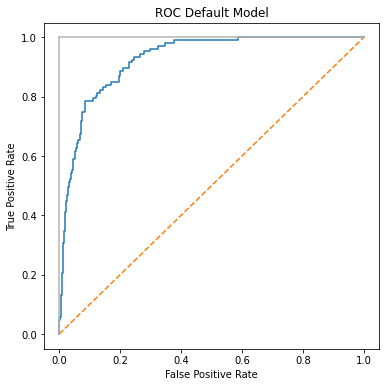

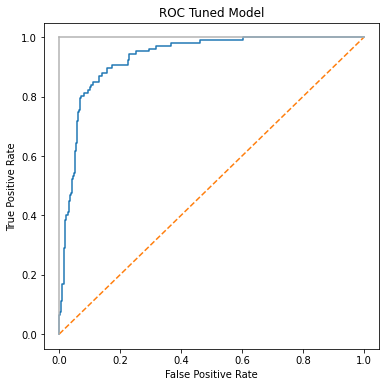

In [ ]:
def plot_auc(y_test, y_pred_proba, titles):
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[::,1])
    
    plt.subplots(1, figsize=(6,6))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.title(titles)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, y_pred_proba_default, 'ROC Default Model')
plot_auc(y_test, y_pred_proba_tuned, 'ROC Tuned Model')

#### **Summary**

> Light GBM

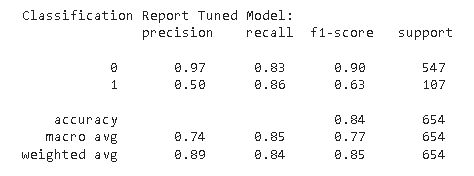

> Cat Boost Classifier

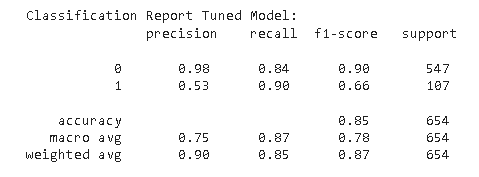

Setelah melakukan hyperparameter tuning kepada 2 model dengan metode yang berbeda tersebut, bisa dilihat bahwa **model dengan menggunakan metode Cat Boost Classifier memiliki performa yang lebih** baik dari pada model dengan metode Light GBM. 

## Feature Importances

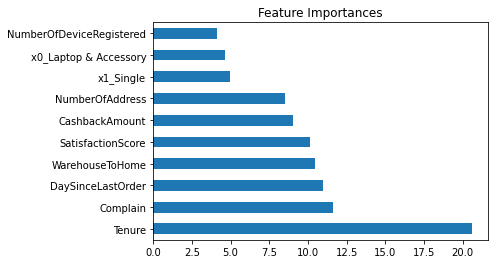

In [ ]:
feature_final = misval_kolom + pipeline_model['preprocess'].transformers_[1][1].get_feature_names().tolist() + ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'CashbackAmount']

feat_imp = pd.Series(best_model['model'].feature_importances_, feature_final).sort_values(ascending = False).head(10)
feat_imp.plot(kind='barh', title='Feature Importances')
plt.show()

Selanjutnya, kita melakukan pencarian Feature Importances. Terlihat pada plot diatas, fitur **Tenure** merupakan fitur yang paling penting pada model yang dibuat dan selanjutnya fitur **Complain** pada urutan kedua.

Sebelumnya kita juga sudah memprediksi fitur apa saja yang dapat menjadi prediktor yang baik yaitu: 
* Tenure
* NumberOfDeciveRegistered
* SatisfactionScore
* Complain
* CashbackAmount

## Conclution & Recomendation

In [ ]:
print('Classification Report Model Tuned: \n', report_tuned)

Classification Report Model Tuned: 
               precision    recall  f1-score   support

           0       0.98      0.84      0.90       547
           1       0.53      0.90      0.66       107

    accuracy                           0.85       654
   macro avg       0.75      0.87      0.78       654
weighted avg       0.90      0.85      0.87       654



### Conclusion

Berdasarkan model yang telah dibuat, apabila model ini akan diimplementasikan (deploy), model akan:
1. **Mendapatkan 84% pelanggan benar-benar tidak akan melakukan churn dari seluruh pelanggan yang terindikasi tidak churn**, sebagai contoh apabila ada 100 orang yang dianggap tidak akan churn maka kemungkinan masih ada 16 orang (100 - 84) yang akan melakukan churn.
1. **Mendapatkan 90% pelanggan benar-benar akan melakukan churn dari seluruh pelanggan yang terindikasi churn**, sebagai contoh apabila ada 100 orang yang dianggap akan churn maka kemungkinan masih ada 10 orang (100 - 90) yang tidak akan churn.
1. **Memprediksi 98% seorang pelanggan tidak akan churn dengan benar**, maksudnya adalah apabila seorang pelanggan dianggap tidak akan melakukan churn maka kemungkinan pelanggan tersebut tidak akan churn sebesar 98%.
1. **Memprediksi 53% seorang pelanggan akan churn dengan benar**, maksudnya adalah apabila seorang pelanggan dianggap akan melakukan churn maka kemungkinan pelanggan tersebut akan churn sebesar 53%

kita akan mencoba mengukur apakah model yang telah dibuat akan berdampak pada perusahaan atau tidak. Apabila seandainya ada 200 data pelnggan (100 pelanggan kategori chrun, 100 pelanggan kategori tidak churn) dan setiap orang memiliki jatah diskon (promosi) sebesar 1 juta, maka perhitungan biaya promosi adalah sebagai berikut:

1. Tanpa Model (semua pelanggan mendapatkan diskon)
  * Total biaya promosi => **200 juta** (didapat dari 200 pelanggan dikali 1 juta)
  * Total biaya terbuang => **200 juta** (didapat dari 200 pelanggan dikali 1 juta karena baik pelanggan dalam kategori churn maupun tidak akan tetap menggunakan promo tersebut)

1. Dengan model (hanya kandidat yang terindikasi churn akan kita berikan diskon tersebut yaitu 100 org dengan jumlah total 100 juta)
  * Total pelanggan churn => **16 pelanggan** (didapat dari 16 orang yang sebenarnya akan churn tapi masuk kedalam kategori pelanggan tidak churn)
  * Total pelanggan berpikir ulang untuk churn => **90 pelanggan** (didapat dari 90 orang dikategori churn yang akan churn, mereka akan berpikir ulang untuk melakukan churn)
  * Total Biaya Terbuang => **10 juta** (didapat dari 10 pelanggan dikategori churn bukan pelanggan churn)
  * Total penghematan => **100 juta** (karena biaya promosi hanya diberikan pada pelanggan dengan kategori churn)

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan akan menghemat biaya yang cukup besar untuk promosi (diskon) pada pelanggan dan dapat menjaga pelanggan agar tidak melakukan churn.

### Recomendation

Rekomendasi pada kegiatan ini adalah:
1. Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali.
1. Menambahkan fitur-fitur atau kolom-kolom baru yang kemungkinan dapat menjadi feature importance dalam model.
1. Menambah data-data baru, khususnya data pelanggan yang melakukan churn harus selalu ditambah agar model dapat berkembang dan menjadi lebih baik.

## Export Model

In [ ]:
file_name = 'model.sav'
pickle.dump(best_model, open(file_name, 'wb'))

## Thank You & Good Luck Everyone